In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [52]:
dataset = pd.read_csv(r"E:\Assignmnet 1/loan_data.csv")

In [53]:
dataset.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [54]:
dataset.isnull().sum()

Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

# Encode categorical Variables

In [55]:
le_emp = LabelEncoder()
dataset["Employment_Status"] = le_emp.fit_transform(dataset["Employment_Status"])  
dataset["Text"] = le_emp.fit_transform(dataset["Text"]) 
dataset["Approval"] = dataset["Approval"].map({"Rejected": 0, "Approved": 1})

In [56]:
X = dataset.drop(columns=["Approval"])
y = dataset["Approval"]

# Train-test split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# prediction

In [72]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.996875


# feature selection

In [60]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,       
    "Importance": importances    
})
feature_importance_df = feature_importance_df.sort_values(by="Importance",ascending=False)

In [63]:
print("Feature Importance:\n")
print(feature_importance_df)

Feature Importance:

             Feature  Importance
5  Employment_Status    0.325203
2       Credit_Score    0.307225
3        Loan_Amount    0.147915
4          DTI_Ratio    0.115413
1             Income    0.092761
0               Text    0.011483


In [62]:
# employment status contribute the most to loan approval in this dataset

# graph

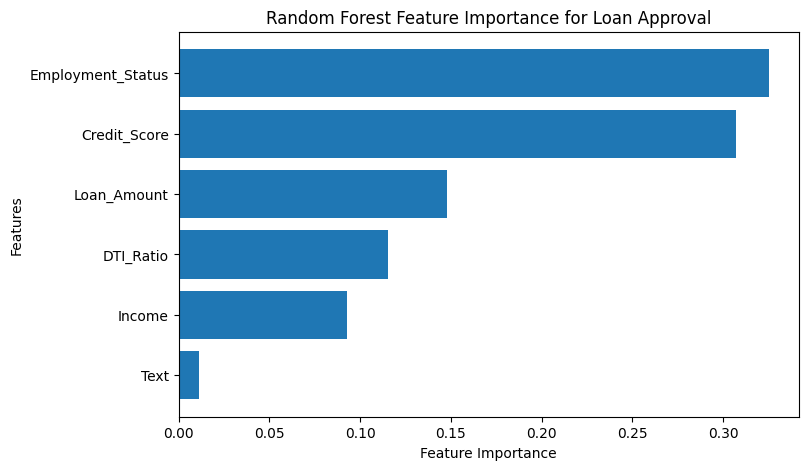

In [66]:
plt.figure(figsize=(8,5))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance for Loan Approval")
plt.gca().invert_yaxis()
plt.show()

# check overfitting

In [75]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)
print("training Accuracy:", train_acc)
print("test Accuracy:", test_acc)

training Accuracy: 1.0
test Accuracy: 0.996875


In [ ]:
# no overfitting 